<a href="https://colab.research.google.com/github/vidhanmehta/Maize-Plant-Disease-Prediction/blob/main/Maize_Plant_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Downloading the data-set**

In [3]:
!kaggle datasets download -d smaranjitghose/corn-or-maize-leaf-disease-dataset

 95% 153M/161M [00:03<00:00, 69.4MB/s]
100% 161M/161M [00:03<00:00, 51.3MB/s]


**Extracting data-set**

In [4]:
from zipfile import ZipFile

dataset = '/content/corn-or-maize-leaf-disease-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


**Accessing the Images**

In [5]:
import os
path, dirs, files = next(os.walk('/content/data/Blight'))
file_count = len(files)
print('Number of images for Blight: ', file_count)

path, dirs, files = next(os.walk('/content/data/Common_Rust'))
file_count = len(files)
print('Number of images for Common Rust: ', file_count)

path, dirs, files = next(os.walk('/content/data/Gray_Leaf_Spot'))
file_count = len(files)
print('Number of images for Grey Leaf Spot: ', file_count)

path, dirs, files = next(os.walk('/content/data/Healthy'))
file_count = len(files)
print('Number of images for Healthy leaf: ', file_count)

Number of images for Blight:  1146
Number of images for Common Rust:  1306
Number of images for Grey Leaf Spot:  574
Number of images for Healthy leaf:  1162


**Importing all necessary libraries**

In [19]:
import PIL
import numpy as np
import tensorflow as tf
import cv2
import keras
import pathlib
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy

In [7]:
data_dir=pathlib.Path(os.getcwd()+"/data/")
maize_leaf_disease_dict={
    "Blight":list(glob.glob(f"{data_dir}/Blight/*")),
    "Common_Rust":list(glob.glob(f"{data_dir}/Common_Rust/*")),
    "Gray_Leaf_Spot":list(glob.glob(f"{data_dir}/Gray_Leaf_Spot/*")),
    "Healthy":list(glob.glob(f"{data_dir}/Healthy/*"))
}

**Assisgning label to all images**

In [8]:
maize_leaf_disease_labels={
    "Blight":0,
    "Common_Rust":1,
    "Gray_Leaf_Spot":2,
    "Healthy":3,
}


In [9]:
print(maize_leaf_disease_labels)

{'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}


**Total number of Images**

In [10]:
print(len(maize_leaf_disease_dict["Blight"]))
print(len(maize_leaf_disease_dict["Common_Rust"]))
print(len(maize_leaf_disease_dict["Gray_Leaf_Spot"]))
print(len(maize_leaf_disease_dict["Healthy"]))

1146
1306
574
1162


In [12]:
print(len(maize_leaf_disease_dict))

4


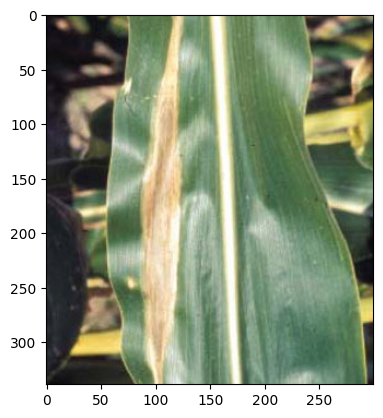

In [24]:
img = mpimg.imread('/content/data/Blight/Corn_Blight (103).jpg')
imgplt = plt.imshow(img)
plt.show()

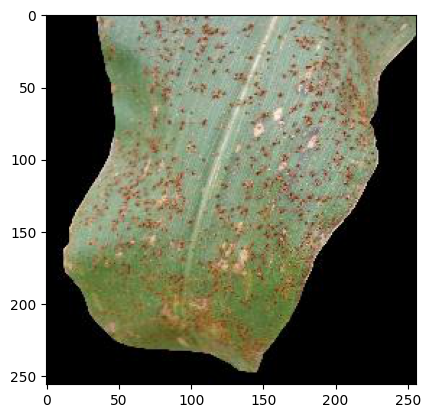

In [25]:
img = mpimg.imread('/content/data/Common_Rust/Corn_Common_Rust (1015).JPG')
imgplt = plt.imshow(img)
plt.show()

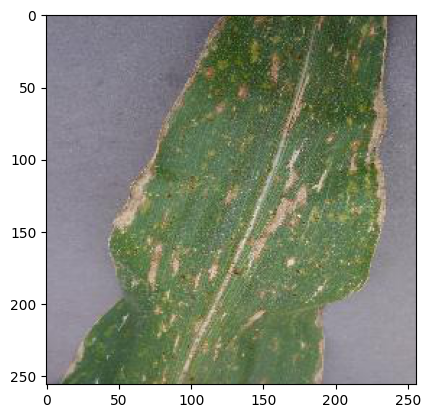

In [26]:
img = mpimg.imread('/content/data/Gray_Leaf_Spot/Corn_Gray_Spot (104).JPG')
imgplt = plt.imshow(img)
plt.show()

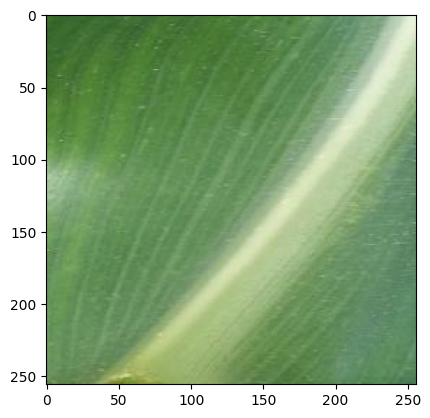

In [27]:
img = mpimg.imread('/content/data/Healthy/Corn_Health (800).jpg')
imgplt = plt.imshow(img)
plt.show()

**From cv2 library convering image into pixels**

In [29]:
x,y=[],[]
for augmented_original,images in maize_leaf_disease_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(maize_leaf_disease_labels[augmented_original])
print(x[0])
print(y[:5])
x=np.array(x)
y=np.array(y)

[[[ 77  86  99]
  [ 68  77  79]
  [ 22  28  20]
  ...
  [ 75  82  89]
  [ 31  51  37]
  [ 84 128  99]]

 [[123 129 137]
  [ 50  58  55]
  [ 18  24  14]
  ...
  [ 96 104 109]
  [ 25  48  32]
  [ 67 117  85]]

 [[119 123 124]
  [ 50  54  47]
  [ 74  78  65]
  ...
  [ 86 101  98]
  [ 49  79  61]
  [ 85 134 102]]

 ...

 [[235 238 216]
  [131 142 113]
  [124 133  99]
  ...
  [234 255 248]
  [206 229 215]
  [166 192 168]]

 [[236 240 215]
  [121 132 100]
  [128 137 101]
  ...
  [163 205 196]
  [216 252 239]
  [196 229 204]]

 [[207 212 185]
  [122 132 101]
  [136 145 109]
  ...
  [ 94 152 136]
  [131 190 164]
  [193 240 219]]]
[0, 0, 0, 0, 0]


**Test-Train split**

In [32]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print("Test : ", len( x_test))
print("Train: ", len(x_train))
print("Total: ", len(x_train)+len( x_test))

Test :  1257
Train:  2931
Total:  4188


**Re-sizing Test and Train Images to 255px.**

In [33]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255
print(x_train_scaled[0])

[[[0.33333333 0.47058824 0.39215686]
  [0.29411765 0.43529412 0.36470588]
  [0.3254902  0.4745098  0.40392157]
  ...
  [0.21960784 0.21960784 0.24313725]
  [0.22745098 0.22745098 0.24705882]
  [0.23137255 0.23137255 0.25490196]]

 [[0.30980392 0.44705882 0.36470588]
  [0.30196078 0.44313725 0.36862745]
  [0.3372549  0.49019608 0.41176471]
  ...
  [0.22352941 0.22352941 0.24705882]
  [0.22745098 0.22745098 0.25098039]
  [0.22745098 0.22745098 0.25098039]]

 [[0.3372549  0.47843137 0.39215686]
  [0.32941176 0.47058824 0.39215686]
  [0.32156863 0.47058824 0.39215686]
  ...
  [0.22352941 0.22352941 0.24705882]
  [0.22352941 0.22352941 0.24705882]
  [0.22352941 0.22352941 0.24705882]]

 ...

 [[0.58823529 0.60784314 0.60392157]
  [0.58039216 0.6        0.59607843]
  [0.67058824 0.69019608 0.68627451]
  ...
  [0.41176471 0.35686275 0.36470588]
  [0.4        0.34509804 0.35294118]
  [0.38039216 0.32156863 0.33333333]]

 [[0.57647059 0.59607843 0.58823529]
  [0.6        0.61960784 0.61568627]
